In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from keras.models import model_from_json
import pandas as pd
import numpy as np
import SimpleITK as sitk
import matplotlib

Using TensorFlow backend.


In [18]:
#just loading np array of example video to confirm shape
array=np.load("C:/Users/dbitterman/Desktop/NSCLC_i3d_project/data/v_CricketShot_g04_c01_rgb.npy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


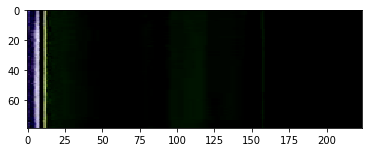

In [32]:
plt.imshow(array[0,:,:,0], cmap="gray")

In [33]:
#checking example shape
array.shape

(1, 79, 224, 224, 3)

In [36]:
#loading mock image and checking shape
nrrd = sitk.ReadImage("C:/Users/dbitterman/Desktop/nsclc_activation_mapping/data/Folder_150/images_150/nsclc_rt_1.nrrd")
test = sitk.GetArrayFromImage(nrrd)

test.shape

(150, 150, 150)

In [66]:
#converting array from 2D to 3D
new=test[75,:,:]
new.shape

(150, 150)

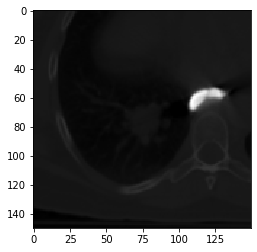

In [53]:
plt.imshow(new, cmap="gray")

In [112]:
#padding image so it is 274x274x274
def pad_with(vector, pad_width, iaxis, kwargs):
     pad_value = kwargs.get('padder', 0)
     vector[:pad_width[0]] = pad_value
     vector[-pad_width[1]:] = pad_value
        
mock = np.pad(new, 37, pad_with)
mock.shape

(224, 224)

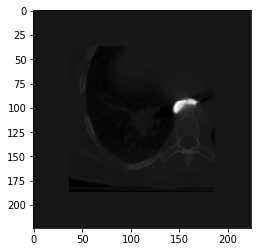

In [113]:
plt.imshow(mock, cmap="gray")

In [114]:
#adding 4th dimension (stacking x3)
mock_3D=np.dstack([mock,mock,mock])
mock_3D.shape

(224, 224, 3)

In [118]:
mock_4D=np.stack([mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D,mock_3D])
mock_4D.shape

(78, 224, 224, 3)

In [122]:
x = [mock_3D for y in range(78)]

x = []
for y in range(78):
    x.append(mock_3D)
    
len(x)

78

In [119]:
mock_5D=np.expand_dims(mock_4D, axis=0)
mock_5D.shape

(1, 78, 224, 224, 3)

In [120]:
np.save('C:/Users/dbitterman/Desktop/NSCLC_i3d_project/data/mock_array.npy', mock_5D)

In [ ]:
#next step wil be to figure how to make the 1x150x150x150x3 array (will need to expand each slide x3 inididually, then add back together somehow)